In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def past_qs(days, code):
    
    for day in days:
            
        if DTBS['A'][code][day]['qs'] == 1:
            return 1
    
    return 0

def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low) 
    
    
    return [i[0] for i in low]
  

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]

In [2]:
codes = list(DTBS['A'].keys())
df = pd.DataFrame(columns=codes)
df
df.to_excel('111.xlsx')

In [3]:
# # save
f_save = open(DTBS_path, 'wb')
pickle.dump(DTBS, f_save)
f_save.close()


In [4]:
codes = ['123195.SZ',
'123193.SZ',
'113669.SH',
'123192.SZ',
'113670.SH'
]
cat1 = ['基础化工(2021)',
'电子(2021)',
'电子(2021)',
'美容护理(2021)',
'轻工制造(2021)'
]
cat2 = ['塑料(2021)',
'消费电子(2021)',
'元件(2021)',
'化妆品(2021)',
'家居用品(2021)'
]
for i in range(5):
    DTBS['B'][codes[i]]['cat1'] = cat1[i]
    DTBS['B'][codes[i]]['cat2'] = cat2[i]

In [5]:
for code in DTBS['A'].keys():
    if DTBS['B'][code]['cat2'] == '中药Ⅱ(2021)' and DTBS['A'][code]['2023-05-29']['ia'] == 1 :
        print(code, DTBS['B'][code]['cn'], DTBS['B'][code]['cat1'], DTBS['B'][code]['cat2'], DTBS['A'][code]['2023-05-29']['qs30'],'余额',DTBS['A'][code]['2023-05-29']['bl'],'货币资金',DTBS['F'][DTBS['B'][code]['sc']]['2023-03']['hb']/100000000)
#     if DTBS['B'][code]['cat1'] == '通信(2021)':
#         print(code, DTBS['B'][code]['cn'], DTBS['B'][code]['cat1'], DTBS['B'][code]['cat2'])

113585.SH 寿仙转债 医药生物(2021) 中药Ⅱ(2021) 30 余额 0.344 货币资金 1.6243105413100002e-07
113660.SH 寿22转债 医药生物(2021) 中药Ⅱ(2021) 0 余额 3.978 货币资金 1.6243105413100002e-07
127006.SZ 敖东转债 医药生物(2021) 中药Ⅱ(2021) 0 余额 24.064 货币资金 1.11531542374e-07
128025.SZ 特一转债 医药生物(2021) 中药Ⅱ(2021) 30 余额 2.113 货币资金 7.0088120019e-08
128091.SZ 新天转债 医药生物(2021) 中药Ⅱ(2021) 30 余额 1.525 货币资金 1.1661320061e-08
128133.SZ 奇正转债 医药生物(2021) 中药Ⅱ(2021) 0 余额 7.994 货币资金 1.5514050455000002e-08


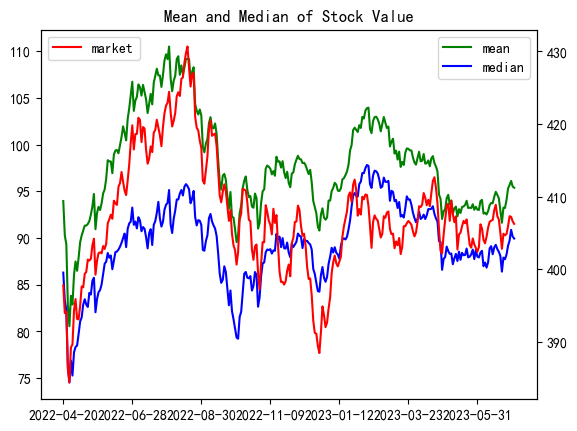

In [6]:
dts = DTBS['D']['day'][1286:]
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
    
all_mean = []
all_median = []
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    
tick_spacing = 45
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of Stock Value')
plt.show()

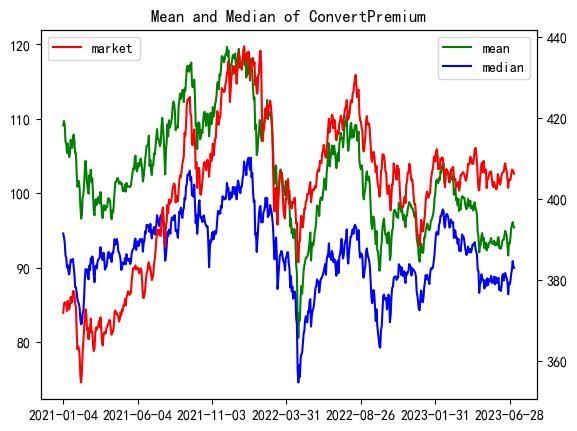

In [7]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

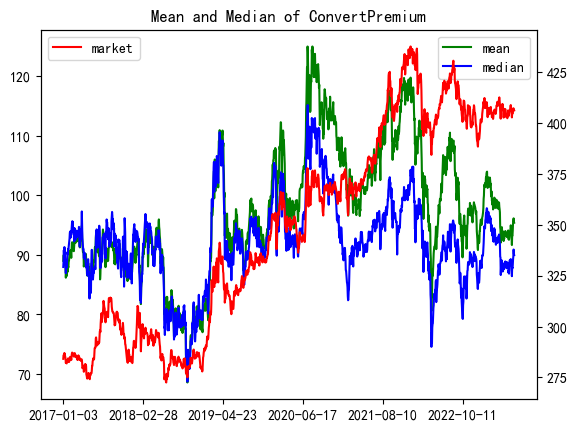

In [8]:
dts = DTBS['D']['day']
all_mean = []
all_median = []
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))

tick_spacing = 280
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

In [9]:
# import seaborn as sns
# plt.figure(dpi=100)
# sns.boxplot(y=c,#传入一组数据
#             orient='v'#箱子垂直显示，默认为'h'水平显示
#            )
# plt.show()

In [10]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
#                 c.append(DTBS['A'][code][dt]['cpr'])
                c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

110-130 平价

SyntaxError: invalid syntax (3836192363.py, line 37)

In [ ]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
# pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
                c.append(DTBS['A'][code][dt]['cpr'])
#                 d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
#     pm.append(np.mean(d))
tick_spacing = 50
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'darkkhaki', label = '收盘价[120,130]转债转股溢价率均值')
ax1.plot(dts, all_median, c = 'indigo', label = '收盘价[120,130]转债转股溢价率均中点')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'maroon', label = '中证转债指数')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('2021年后收盘价[120,130]转债转股溢价率与中证转债指数')
plt.savefig('2021年后收盘价[120,130]转债转股溢价率与中证转债指数', dpi=300)
plt.show()

In [ ]:
DTBS['D']['day'][1217]

In [ ]:
dts = DTBS['D']['day'][1217:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 120 and  DTBS['A'][code][dt]['dp'] > 110:
                c.append(DTBS['A'][code][dt]['cpr'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium for price between 110 and 120')
plt.show()

In [ ]:
dts = DTBS['D']['day'][1217:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
                c.append(DTBS['A'][code][dt]['cpr'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium for price between 120 and 130')
plt.show()

In [ ]:
cat1 = []
for cd in DTBS['A'].keys():
    cat1.append(DTBS['B'][cd]['cat1'])
#     print(cd, DTBS['B'][cd]['cat1'])
    
cat1 = set(cat1)
cat1

In [ ]:
ttl = 0
dt = DTBS['D']['day'][-1]
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt]['ia']:
        ttl += DTBS['A'][cd][dt]['bl']
    
print(ttl)
re = []
for c in cat1:
    s = 0
    for cd in DTBS['A'].keys():
        if DTBS['A'][cd][dt]['ia']:
            if DTBS['B'][cd]['cat1'] == c:
                s += DTBS['A'][cd][dt]['bl']
                
    re.append(s)
    
    
    

In [ ]:
for i in re:
    print(i)

In [ ]:
DTBS['D']['day'][-1]

In [ ]:
dts = DTBS['D']['day'][974:]
# dts = DTBS['D']['day']
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
    
r = [[],[],[],[],[]]
for dt in dts:
    c = [[],[],[],[],[]]
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            
#             c.append(DTBS['A'][code][dt]['cpr'])
#             if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
#                 c.append((code, DTBS['A'][code][dt]['cpr']))
            re = (100.0/DTBS['A'][code][dt]['csp'])*(DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
            if re >= 70.0 and re < 80.0:
                c[0].append(code)
            elif re >= 80.0 and re < 90.0:
                c[1].append(code)
            elif re >= 90.0 and re < 100.0:
                c[2].append(code)
            elif re >= 100.0 and re <110.0:
                c[3].append(code)
            elif re >= 110.0 and re < 120.0:
                c[4].append(code)         
                
    for i in range(5):
        lst = []
        for nm in c[i]:

            lst.append(DTBS['A'][nm][dt]['cpr'])
            
        if lst == []:
            r[i].append(np.nan)
            # r[i].append(r[i-1])
        else:
            r[i].append(round(np.median(lst),2))
            
            
        
            
        
# DTBS['B']['113577.SH']['sc']

#     if c == []:
#         print(dt, "No Candidate!!!")
#     else:
#         print(dt, 'min:', round(np.min(c),2), 'q1:',  round(np.quantile(a=c, q = 0.25),2), 'median:', round(np.median(c),2), 'q3:', round(np.quantile(a=c, q = 0.75),2),'max:', round( np.max(c),2))
#     if np.max(c) < 120:
#         print("cheap")


In [ ]:
# def missing_plot(x, y):
#     x_n = x.copy()
#     y_n = y.copy()
#     for i in range(len(y_n)):
#         if y_n[i] == -999:
#             del x_n[i]
#             del y_n[i]
            
        
#     return x_n, y_n

plt.rcParams['figure.figsize'] = (12.0, 8.0) 


tick_spacing = 50
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, r[0], label = '平价70-80')
ax1.plot(dts, r[1],  label = '平价80-90')
ax1.plot(dts, r[2],   label = '平价90-100')
ax1.plot(dts, r[3],   label = '平价100-110')
ax1.plot(dts, r[4], label = '平价110-120')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'k', label = '中证转债指数')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('转债平价区间转股溢价率中点与中证转债指数图')
plt.savefig('平价', dpi=300)
plt.show()

In [ ]:
# cat1 = []
# for cd in DTBS['A'].keys():
#     cat1.append(DTBS['B'][cd]['cat1'])
    
# cat1 = set(cat1)
# cat1 = list(cat1)
cat1 = ['农林牧渔(2021)',
 '医药生物(2021)',
 '机械设备(2021)',
 '基础化工(2021)',
 '国防军工(2021)',
 '煤炭(2021)',
 '美容护理(2021)',
 '电子(2021)',
 '电力设备(2021)',
 '建筑材料(2021)',
 '环保(2021)',
 '非银金融(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '轻工制造(2021)',
 '公用事业(2021)',
 '商贸零售(2021)',
 '传媒(2021)',
 '钢铁(2021)',
 '食品饮料(2021)',
 '有色金属(2021)',
 '交通运输(2021)',
 '银行(2021)',
 '建筑装饰(2021)',
 '汽车(2021)',
 '纺织服饰(2021)',
 '家用电器(2021)',
 '计算机(2021)',
 '通信(2021)']
# cat1 = [
#  '电力设备(2021)']
print(len(cat1))

In [ ]:
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS.keys())

In [ ]:
dts = DTBS['D']['day'][974:-3]
dts

In [ ]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (20.0, 8.0) 
dts = DTBS['D']['day'][1217:-3]
# dts = DTBS['D']['day']
zz = []

plt.rcParams['figure.figsize'] = (15, 11) 
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46


for idt in cat1:
    all_median = []
    all_mean = []
    id_close = []
    count = 0
    for dt in dts:
        count+=1
        c = []
        d = []
        for code in DTBS['A'].keys():
            if DTBS['A'][code][dt]['ia'] == 1:
                
                if DTBS['B'][code]['cat1'] == idt:
                    if DTBS['A'][code][dt]['dp'] <= 999 and DTBS['A'][code][dt]['dp'] >= 0:
                        c.append(DTBS['A'][code][dt]['cpr']+DTBS['A'][code][dt]['dp'])
                        d.append(DTBS['A'][code][dt]['dp'])
#                         d.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                    
        all_median.append(np.median(c))  
        all_mean.append(np.median(d))      
#         print(count)

        id_close.append(float(sw_df.iloc[count][idt].replace(',','')))
    
    

    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(dts, all_median, c = 'blueviolet',linestyle='solid', label = '行业转债双低中点')

    ax1.legend(loc=1)
    ax2 = ax1.twinx()
    ax2.plot(dts, zz, c = 'lightseagreen', linestyle='solid',label = '中正转债指数')
    ax2.legend(loc=4)
    ax2.get_yaxis().set_visible(False) 
#     ax3 = ax1.twinx()
#     ax3.plot(dts, all_mean, c = 'maroon',linestyle='solid', label = '行业转债转股溢价率中点')
#     ax3.legend(loc=2)lightseagreen
#     ax4 = ax1.twinx()
#     ax4.plot(dts, id_close, c = 'goldenrod',linestyle='solid', label = '申万行业指数')
#     ax4.legend(loc=3)
    ax4 = ax1.twinx()
    ax4.plot(dts, all_mean, c = 'goldenrod',linestyle='solid', label = '行业转债收盘价中点')
    ax4.legend(loc=3)
#     ax4.get_yaxis().set_visible(False) 
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.title('行业：'+ idt[:-6] +'双低中点与收盘价中点、中证转债指数')
    plt.savefig(idt[:-6], dpi=300)
    print(idt)
    print('行业：'+ idt[:-6] +'双低中点q0.00', round(np.quantile(a=all_median, q = 0),2))
    print('行业：'+ idt[:-6] +'双低中点q0.25', round(np.quantile(a=all_median, q = 0.25),2))
    print('行业：'+ idt[:-6] +'双低中点q0.50',round(np.quantile(a=all_median, q = 0.5) ,2))
    print('行业：'+ idt[:-6] +'双低中点q0.75',round(np.quantile(a=all_median, q = 0.75) ,2))
    print('行业：'+ idt[:-6] +'双低中点q1.00', round(np.quantile(a=all_median, q = 1),2))
#     print('行业：'+ idt[:-6] +'均值q0.25',round(np.quantile(a=all_mean, q = 0.25) ,2))
#     print('行业：'+ idt[:-6] +'均值q0.50',round(np.quantile(a=all_mean, q = 0.5) ,2))
#     print('行业：'+ idt[:-6] +'均值q0.75',round(np.quantile(a=all_mean, q = 0.75) ,2))
    print('今日(2023-04-25) 双低中点',round(all_median[-1],2))
        
# plt.show()


In [ ]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (20.0, 8.0) 
dts = DTBS['D']['day'][1217:-3]
# dts = DTBS['D']['day']
zz = []

plt.rcParams['figure.figsize'] = (15, 11) 
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46


all_median = []
all_mean = []
id_close = []
count = 0

for dt in dts:
    count+=1
    c = []
    d = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['bl'] <= 3:
                c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                d.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                    
    all_median.append(np.median(c))  
    all_mean.append(np.mean(d))      
#         print(count)

#     id_close.append(float(sw_df.iloc[count][idt].replace(',','')))
    


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_median, c = 'blueviolet',linestyle='solid', label = '小市值中点')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'maroon', linestyle='solid',label = '中正转债指数')
ax2.legend(loc=4)
ax2.get_yaxis().set_visible(False) 
# ax3 = ax1.twinx()
# ax3.plot(dts, all_mean, c = 'lightseagreen',linestyle='solid', label = '双低均值')
# ax3.legend(loc=2)
# ax4 = ax1.twinx()
# ax4.plot(dts, id_close, c = 'goldenrod',linestyle='solid', label = '申万行业指数')
# ax4.legend(loc=3)
ax4.get_yaxis().set_visible(False) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('小市值中点')
plt.savefig(idt[:-6], dpi=300)


        
plt.show()


In [ ]:
print("小市值中点")
print('中点q0,25', round(np.quantile(a=all_median, q = 0.25),2))
print('中点q0,50',round(np.quantile(a=all_median, q = 0.5) ,2))
print('中点q0,75',round(np.quantile(a=all_median, q = 0.75) ,2))
print('均值q0,25',round(np.quantile(a=all_mean, q = 0.25) ,2))
print('均值q0,50',round(np.quantile(a=all_mean, q = 0.5) ,2))
print('均值q0,75',round(np.quantile(a=all_mean, q = 0.75) ,2))

In [ ]:
sw_path =  os.path.join(raw_data_path, "sw_idid.CSV")

sw_df = pd.read_csv(sw_path,encoding='gb18030')
sw_df.set_index('Date',inplace=True)
sw_df.iloc[1]['传媒(2021)']
sw_df

In [ ]:
import seaborn as sns
plt.figure(dpi=100)
sns.boxplot(y=c,#传入一组数据
            orient='v'#箱子垂直显示，默认为'h'水平显示
           )
plt.show()

In [ ]:
y = [-1,-2,-3]

In [ ]:
del y[1]
y

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot([0,1,2,3,4],[2,2,np.nan,2,4])
plt.show()

In [ ]:
m6 = []
for code in DTBS['B'].keys():
    if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= datetime.datetime.strptime('2022-11-01', '%Y-%m-%d'):
        m6.append(code)
print(m6)
print(len(m6))

In [ ]:
DTBS['B']['123164.SZ']

In [ ]:
12月 14支
1月 9支
2月 6支
3月 9支
4月 27支

In [ ]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (20.0, 8.0) 
dts = DTBS['D']['day'][1217:-3]
# dts = DTBS['D']['day']
zz = []

plt.rcParams['figure.figsize'] = (15, 11) 
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46


all_median = []
all_mean = []
id_close = []
count = 0

for dt in dts:
    count+=1
    c = []
    d = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['bl'] <= 3:
                c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                d.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                    
    all_median.append(np.median(c))  
    all_mean.append(np.mean(d))      
#         print(count)

#     id_close.append(float(sw_df.iloc[count][idt].replace(',','')))
    


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_median, c = 'blueviolet',linestyle='solid', label = '小市值中点')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'maroon', linestyle='solid',label = '中正转债指数')
ax2.legend(loc=4)
ax2.get_yaxis().set_visible(False) 
# ax3 = ax1.twinx()
# ax3.plot(dts, all_mean, c = 'lightseagreen',linestyle='solid', label = '双低均值')
# ax3.legend(loc=2)
# ax4 = ax1.twinx()
# ax4.plot(dts, id_close, c = 'goldenrod',linestyle='solid', label = '申万行业指数')
# ax4.legend(loc=3)
ax4.get_yaxis().set_visible(False) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('小市值中点')
plt.savefig(idt[:-6], dpi=300)


        
plt.show()

In [ ]:
datetime.datetime.strptime('2022-02-27', '%Y-%m-%d')  >= (datetime.datetime.strptime('2023-04-27', '%Y-%m-%d') + datetime.timedelta(days=-180))

In [ ]:
# PGX
plt.rcParams['figure.figsize'] = (15, 11) 
dts = DTBS['D']['day'][1217:1537]
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46

all_mean1 = []

all_mean2 = []
all_mean3 = []
for dt in dts:
    c = []
    d = []
    e = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['pd'] >= 20:
                c.append(DTBS['A'][code][dt]['cpr'] )
                d.append(DTBS['A'][code][dt]['dp'] )    
    all_mean1.append(np.mean(c))
    all_mean2.append(np.mean(d))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean1, c = 'blueviolet',linestyle='solid', label = '偏股型转债转股溢价率')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'goldenrod', linestyle='solid',label = '中正转债指数')
ax2.legend(loc=2)
# ax2.get_yaxis().set_visible(False) 

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('偏股型转债')
plt.savefig('偏股型转债', dpi=300)

all_mean1_clean = [i for i in all_mean1 if not np.isnan(i)]
print('转股溢价率q0.00', round(np.quantile(a=all_mean1_clean, q = 0),2))
print('转股溢价率q0.25', round(np.quantile(a=all_mean1_clean, q = 0.25),2))
print('转股溢价率q0.50', round(np.quantile(a=all_mean1_clean, q = 0.5),2))
print('转股溢价率q0.75', round(np.quantile(a=all_mean1_clean, q = 0.75),2))
print('转股溢价率q1.00', round(np.quantile(a=all_mean1_clean, q = 1),2))

print('最新(2023-04-28)共有',len(d) ,'支偏股型转债, 今日均价',round(all_mean2[-1],2),'今日平均转股溢价率',round(all_mean1[-1],2))
        
        
plt.show()

In [ ]:
# PZX
plt.rcParams['figure.figsize'] = (15, 11) 
dts = DTBS['D']['day'][1217:1547]
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 50

all_mean1 = []

all_mean2 = []
all_mean3 = []
for dt in dts:
    c = []
    d = []
    e = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['pd'] <= -20:
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
                d.append(DTBS['A'][code][dt]['dp'] )    
    all_mean1.append(np.mean(c))
    all_mean2.append(np.mean(d))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean1, c = 'blueviolet',linestyle='solid', label = '偏债型转债到期收益率')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'goldenrod', linestyle='solid',label = '中正转债指数')
ax2.legend(loc=2)
# ax2.get_yaxis().set_visible(False) 

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('偏债型转债')
plt.savefig('偏债型转债', dpi=300)

all_mean1_clean = [i for i in all_mean1 if not np.isnan(i)]
print('到期收益率q0.00', round(np.quantile(a=all_mean1_clean, q = 0),2))
print('到期收益率q0.25', round(np.quantile(a=all_mean1_clean, q = 0.25),2))
print('到期收益率q0.50', round(np.quantile(a=all_mean1_clean, q = 0.5),2))
print('到期收益率q0.75', round(np.quantile(a=all_mean1_clean, q = 0.75),2))
print('到期收益率q1.00', round(np.quantile(a=all_mean1_clean, q = 1),2))

print('最新(2023-04-28)共有',len(d) ,'支偏债型转债, 今日均价',round(all_mean2[-1],2),'今日平均到期收益率',round(all_mean1[-1],2))
        
        
plt.show()

In [ ]:
# PHX
plt.rcParams['figure.figsize'] = (15, 11) 
dts = DTBS['D']['day'][1217:1578]
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 26

all_mean1 = []

all_mean2 = []
all_mean3 = []
for dt in dts:
    c = []
    d = []
    e = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if not DTBS['A'][code][dt].__contains__('pd'):
                print(code, dt)
            if DTBS['A'][code][dt]['pd'] >= -20 and  DTBS['A'][code][dt]['pd'] <= 20 :
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
                d.append(DTBS['A'][code][dt]['dp'] )    
                e.append(DTBS['A'][code][dt]['cpr'] )
    all_mean1.append(np.mean(c))
    all_mean2.append(np.mean(d))
    all_mean3.append(np.mean(e))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean1, c = 'blueviolet',linestyle='solid', label = '平衡型转债到期收益率')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'goldenrod', linestyle='solid',label = '中证转债指数')
ax2.legend(loc=4)
ax2.get_yaxis().set_visible(False) 

ax3 = ax1.twinx()
ax3.plot(dts, all_mean3, c = 'lightseagreen',linestyle='solid', label = '平衡型转债转股溢价率')
ax3.legend(loc=2)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('平衡型转债')
plt.savefig('平衡型转债', dpi=300)

all_mean3_clean = [i for i in all_mean3 if not np.isnan(i)]
print('------------------------------------')
print('转股溢价率q0.00', round(np.quantile(a=all_mean3_clean, q = 0),2))
print('转股溢价率q0.25', round(np.quantile(a=all_mean3_clean, q = 0.25),2))
print('转股溢价率q0.50', round(np.quantile(a=all_mean3_clean, q = 0.5),2))
print('转股溢价率q0.75', round(np.quantile(a=all_mean3_clean, q = 0.75),2))
print('转股溢价率q1.00', round(np.quantile(a=all_mean3_clean, q = 1),2))
print('------------------------------------')
print('转股溢价率q0.1', round(np.quantile(a=all_mean3_clean, q = 0.1),2))
print('转股溢价率q0.2', round(np.quantile(a=all_mean3_clean, q = 0.2),2))
print('转股溢价率q0.3', round(np.quantile(a=all_mean3_clean, q = 0.3),2))
print('转股溢价率q0.4', round(np.quantile(a=all_mean3_clean, q = 0.4),2))
print('转股溢价率q0.6', round(np.quantile(a=all_mean3_clean, q = 0.6),2))
print('转股溢价率q0.7', round(np.quantile(a=all_mean3_clean, q = 0.7),2))
print('转股溢价率q0.8', round(np.quantile(a=all_mean3_clean, q = 0.8),2))
print('转股溢价率q0.9', round(np.quantile(a=all_mean3_clean, q = 0.9),2))

all_mean1_clean = [i for i in all_mean1 if not np.isnan(i)]
print('------------------------------------')
print('到期收益率q0.00', round(np.quantile(a=all_mean1_clean, q = 0),2))
print('到期收益率q0.25', round(np.quantile(a=all_mean1_clean, q = 0.25),2))
print('到期收益率q0.50', round(np.quantile(a=all_mean1_clean, q = 0.5),2))
print('到期收益率q0.75', round(np.quantile(a=all_mean1_clean, q = 0.75),2))
print('到期收益率q1.00', round(np.quantile(a=all_mean1_clean, q = 1),2))
print('------------------------------------')
print('到期收益率q0.1', round(np.quantile(a=all_mean1_clean, q = 0.1),2))
print('到期收益率q0.2', round(np.quantile(a=all_mean1_clean, q = 0.2),2))
print('到期收益率q0.3', round(np.quantile(a=all_mean1_clean, q = 0.3),2))
print('到期收益率q0.4', round(np.quantile(a=all_mean1_clean, q = 0.4),2))
print('到期收益率q1.6', round(np.quantile(a=all_mean1_clean, q = 0.6),2))
print('到期收益率q0.7', round(np.quantile(a=all_mean1_clean, q = 0.7),2))
print('到期收益率q0.8', round(np.quantile(a=all_mean1_clean, q = 0.8),2))
print('到期收益率q0.9', round(np.quantile(a=all_mean1_clean, q = 0.9),2))

print('最新'+dts[-1]+'共有',len(d) ,'支平衡型转债, 今日均价',round(all_mean2[-1],2),'今日平均到期收益率',round(all_mean1[-1],2),'今日平均转股溢价率',round(all_mean3[-1],2))
        

        
plt.show()

In [ ]:
dt1 = '2023-04-28'
dt2 = '2023-05-04'

for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt1]['ia'] == 1:
        print(DTBS['A'][cd][dt1]['pd'], DTBS['A'][cd][dt2]['pd'])


In [ ]:
DTBS['A']['110088.SH']['2023-05-12']

In [ ]:
for i in DTBS['A'].keys():
    if not DTBS['A'][i]['2023-05-12'].__contains__('pd'):
        print(i)

In [ ]:
['123194.SZ'
,'111013.SH'
,'123195.SZ'
,'123193.SZ'
,'113669.SH'
,'123192.SZ']

In [ ]:
mean = []
for cd in DTBS['A'].keys():
    if DTBS['A'][cd]['2023-05-15']['ia'] == 1:
        if DTBS['A'][cd]['2023-05-15']['dl'] != 999:
            mean.append(DTBS['A'][cd]['2023-05-15']['dl'])
        
print(np.mean(mean))

In [ ]:
dts = DTBS['D']['day'][973]
dts

In [ ]:
# PHX
plt.rcParams['figure.figsize'] = (15, 11) 
dts = DTBS['D']['day'][974:1554]
# zz = []
# for dt in dts:
#     zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46

all_mean1 = []

# all_mean2 = []
# all_mean3 = []
for dt in dts:
    c = []
#     d = []
#     e = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            
            if not np.isnan(DTBS['A'][code][dt]['dl']) and DTBS['A'][code][dt]['dl'] != 999:
                c.append(DTBS['A'][code][dt]['dl'] )
    all_mean1.append(np.mean(c))
#     all_mean2.append(np.mean(d))
#     all_mean3.append(np.mean(e))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean1, c = 'blueviolet',linestyle='solid', label = '双低每日均值变化')
ax1.legend(loc=1)

# ax2 = ax1.twinx()
# ax2.plot(dts, zz, c = 'goldenrod', linestyle='solid',label = '中证转债指数')
# ax2.legend(loc=2)




ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('21年之后双低每日均值变化与中证转债指数')
plt.savefig('21年之后双低每日均值变化与中证转债指数', dpi=300)

print('------------------------------------')
print('21年之后双低每日均值q0.00', round(np.quantile(a=all_mean1, q = 0),2))
print('21年之后双低每日均值q0.25', round(np.quantile(a=all_mean1, q = 0.25),2))
print('21年之后双低每日均值q0.50', round(np.quantile(a=all_mean1, q = 0.5),2))
print('21年之后双低每日均值q0.75', round(np.quantile(a=all_mean1, q = 0.75),2))
print('21年之后双低每日均值q1.00', round(np.quantile(a=all_mean1, q = 1),2))

In [ ]:
# qs display
dt = '2023-05-16'
qsl = []
print(dt+'强赎统计（未考虑强赎公告)')
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt]['ia'] == 1:
        if DTBS['A'][cd][dt]['qs30'] > 0:
            qsl.append((cd,DTBS['A'][cd][dt]['qs30']))
            
qsl.sort(key=takeSecond, reverse=True)


qslcd = [i[0] for i in qsl]
for r in qslcd:
    print(r, DTBS['B'][r]['cn'], DTBS['B'][r]['sc'],  DTBS['B'][r]['sn'],  '强赎：' + str (DTBS['A'][r][dt]['qs']) + '/1, ' + str (DTBS['A'][r][dt]['qs15']) + '/15, '+ str (DTBS['A'][r][dt]['qs30']) + '/30 ' ,"收盘价：", DTBS['A'][r][dt]['dp'],  "转股溢价率：", DTBS['A'][r][dt]['cpr'], "到期收益率：", DTBS['A'][r][dt]['ytm'],"换手率：", DTBS['A'][r][dt]['trt'], '市值',  DTBS['A'][r][dt]['bl'], '双低', DTBS['A'][r][dt]['dl'], '申万一级', DTBS['B'][r]['cat1'],'申万二级', DTBS['B'][r]['cat2'])

In [ ]:
DTBS['C']['zi']['2023-05-08']=409.4431
DTBS['C']['zi']['2023-05-09']=407.5744
DTBS['C']['zi']['2023-05-10']=406.4801
DTBS['C']['zi']['2023-05-11']=407.2853
DTBS['C']['zi']['2023-05-12']=402.7188
DTBS['C']['zi']['2023-05-15']=404.7729
DTBS['C']['zi']['2023-05-16']=405.0316
DTBS['C']['zi']['2023-05-17']=405.9087
DTBS['C']['zi']['2023-05-18']=406.6546

In [ ]:
cd = list(DTBS['A'].keys())

In [ ]:
df = pd.DataFrame(cd)

In [ ]:
df.to_csv('111.csv')

In [ ]:
dt1 = '2023-05-29'
dt2 = '2023-05-30'
s1 = 0
s2 = 0
c = 0
for code in DTBS['A'].keys():
    if DTBS['B'][code]['cat1'] == '传媒(2021)' and DTBS['A'][code][dt1]['ia'] == 1 and DTBS['A'][code][dt2]['ia'] == 1:
        print(code, DTBS['B'][code]['cn'], DTBS['B'][code]['cat2'][:-6],'昨日价格', round(DTBS['A'][code][dt1]['dp'],2), '今日价格',  round(DTBS['A'][code][dt2]['dp'],2), '变化率', str(round(((DTBS['A'][code][dt2]['dp']/DTBS['A'][code][dt1]['dp'] - 1)*100),2)) + '%')
        s1 += DTBS['A'][code][dt1]['dp']
        s2 += DTBS['A'][code][dt2]['dp']
        
        c += 1
print('传媒转债共有', c, '支')
print('昨天2023-05-29到今天2023-05-30平均收益率为'+str(round(((DTBS['A'][code][dt2]['dp']/DTBS['A'][code][dt1]['dp'] - 1)*100),2)) + '%')

In [ ]:
dt1 = '2023-05-25'
dt2 = '2023-05-26'
dt3 = '2023-05-29'
dt4 = '2023-05-30'
code = '113660.SH'
print(code, DTBS['B'][code]['cn'],  DTBS['B'][code]['cat1'][:-6],DTBS['B'][code]['cat2'][:-6])
dt = dt1
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt2
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt3
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt4
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )


In [ ]:

dt1 = '2023-05-25'
dt2 = '2023-05-26'
dt3 = '2023-05-29'
dt4 = '2023-05-30'
code = '128074.SZ'
print(code, DTBS['B'][code]['cn'],  DTBS['B'][code]['cat1'][:-6],DTBS['B'][code]['cat2'][:-6])
dt = dt1
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt2
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt3
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )
dt = dt4
print(dt,'收盘价', round(DTBS['A'][code][dt]['dp'],2), '换手率', str(round(DTBS['A'][code][dt]['trt'],2)) + '%' )


In [ ]:
dt = '2023-05-30'
trt_list =[]
for code in DTBS['A'].keys():
    if DTBS['A'][code][dt]['ia'] == 1 and not np.isnan(DTBS['A'][code][dt]['ytm']):
        bl_list.append(DTBS['A'][code][dt]['ytm'])

In [ ]:
print('YTMq0.0', round(np.quantile(a=bl_list, q = 0.0),2))
print('YTMq0.1', round(np.quantile(a=bl_list, q = 0.1),2))
print('YTMq0.2', round(np.quantile(a=bl_list, q = 0.2),2))
print('YTMq0.3', round(np.quantile(a=bl_list, q = 0.3),2))
print('YTMq0.4', round(np.quantile(a=bl_list, q = 0.4),2))
print('YTMq0.5', round(np.quantile(a=bl_list, q = 0.5),2))
print('YTMq0.6', round(np.quantile(a=bl_list, q = 0.6),2))
print('YTMq0.7', round(np.quantile(a=bl_list, q = 0.7),2))
print('YTMq0.8', round(np.quantile(a=bl_list, q = 0.8),2))
print('YTMq0.9', round(np.quantile(a=bl_list, q = 0.9),2))
print('YTMq1.0', round(np.quantile(a=bl_list, q = 1.0),2))

In [ ]:
print('YTMq0.0', round(np.quantile(a=bl_list, q = 0.0),2))
print('YTMq0.1', round(np.quantile(a=bl_list, q = 0.1),2))
print('YTMq0.2', round(np.quantile(a=bl_list, q = 0.2),2))
print('YTMq0.3', round(np.quantile(a=bl_list, q = 0.3),2))
print('YTMq0.4', round(np.quantile(a=bl_list, q = 0.4),2))
print('YTMq0.5', round(np.quantile(a=bl_list, q = 0.5),2))
print('YTMq0.6', round(np.quantile(a=bl_list, q = 0.6),2))
print('YTMq0.7', round(np.quantile(a=bl_list, q = 0.7),2))
print('YTMq0.8', round(np.quantile(a=bl_list, q = 0.8),2))
print('YTMq0.9', round(np.quantile(a=bl_list, q = 0.9),2))
print('YTMq1.0', round(np.quantile(a=bl_list, q = 1.0),2))

In [ ]:
dt1 = '2023-05-31'
# dt1 = '2023-05-26'
dt2 = '2023-06-06'
count = 0
s1 = 0
s2 = 0
s3 = 0
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt1]['ia'] == 1 and DTBS['A'][cd][dt2]['ia'] == 1 and DTBS['A'][cd][dt1]['dp'] > 140 and DTBS['A'][cd][dt1]['dp'] < 1000000:
        s1 += DTBS['A'][cd][dt1]['dp'] 
        s2 += DTBS['A'][cd][dt2]['dp'] 
        s1 = DTBS['A'][cd][dt1]['dp'] 
        s2 = DTBS['A'][cd][dt2]['dp'] 
        s3 += s2/s1 -1
        count += 1
# ic = (s2-s1)/s1 * 100
# print(str(round(ic,2))+ '%')
ic = s3/count*100
print(str(round(ic,4))+ '%')

In [ ]:
193.9549/192.1218

In [ ]:
dt1 = '2023-05-31'
# dt1 = '2023-05-26'
dt2 = '2023-06-02'
count = 0
s1 = 0
s2 = 0
s3 = 0
mean = []
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt1]['ia'] == 1 and DTBS['A'][cd][dt2]['ia'] == 1 and DTBS['A'][cd][dt2]['dp'] > 100 and DTBS['A'][cd][dt2]['dp'] < 130:

        count += 1
        
        
print(count)

In [ ]:
dt2 = '2023-06-06'
for cd in DTBS['B'].keys():
    if DTBS['A'][cd][dt2]['ia'] == 1 and DTBS['B'][cd]['cat1'] == '银行(2021)':
        print(cd, DTBS['B'][cd]['cn'] )

In [ ]:
d1 = '2023-06-09'
d2 = '2023-06-16'
re = []
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][d1]['ia'] == 1 and DTBS['A'][cd][d2]['ia'] == 1:
        re.append((cd,round( (DTBS['A'][cd][d2]['dp']/DTBS['A'][cd][d1]['dp']-1)*100,2),DTBS['B'][cd]['cn'],DTBS['B'][cd]['cat1'],DTBS['A'][cd][d2]['dp'],DTBS['A'][cd][d1]['dp']))
        
print(re)

In [ ]:
re.sort(key=takeSecond,reverse = True)
for i in re:
    print(i)

In [ ]:
dts = DTBS['D']['day'][1442:]
codes = ['127028.SZ','113618.SH','113625.SH', '113655.SH','128145.SZ','118014.SH','118021.SH','113634.SH'] 
codes = ['127028.SZ','113618.SH','113625.SH', '113655.SH','118014.SH','118021.SH','113634.SH'] 
d0 = dts[0]
dn1 = dts[-1]
ini = []
s1 = 0
s2 = 0
for cd in codes:
    ini.append((cd,DTBS['B'][cd]['cn'], DTBS['A'][cd][d0]['dp']))
    s1 += DTBS['A'][cd][d0]['dp']
print('2022-12-8持仓成本')
for i in ini:
    print(i)

satisfy = []
norep = []

# for i in ini:
#     for dt in dts:
#         if DTBS['A'][i[0]][dt]['dp'] >= 140.0:
            
#             if i[0] not in norep:
#                 satisfy.append((i[0],DTBS['B'][i[0]]['cn'], dt, DTBS['A'][i[0]][dt]['dp'] ))
#                 s2 +=  DTBS['A'][i[0]][dt]['dp'] 
#                 norep.append(i[0])
# print('12-8至今，达到过140的转债，以及他们首次达到140的当日收盘价')
# for i in satisfy:
#     print(i)

print('其他没满足的至今的价格（2023-6-26')
now = []     
for i in ini:
    if i[0] not in norep:
        now.append((i[0],DTBS['B'][i[0]]['cn'], dt, DTBS['A'][i[0]][dn1]['dp'] ))
        s2 +=  DTBS['A'][i[0]][dn1]['dp']

for i in now:
    print(i)


print('12-8成本和为',s1,'6-27成本和为',s2)
print('等量收益率为：',round(((s2/s1 - 1)*100),2), '%')

In [ ]:
dt = '2023-07-03'
prc = []
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt]['ia']== 1:
        prc.append(DTBS['A'][cd][dt]['dp'])
        
print(np.mean(prc))
print(np.median(prc))